
# Geoherb identification

## Data Set ID: 754b 铁皮石斛拉曼光谱

[云南，浙江温州]

铁皮石斛
铁皮石斛拉曼光谱采集
（1）采集多个产地的铁皮石斛干品样本，每个产地收集x份，样品经中药高速粉碎机成粉末样品，过200目筛后放入自封袋保存备用。
（2）实验采用美国Thermofisher公司生产的DXR2xi型显微拉曼光谱仪，拉曼光谱系统的激发波长为785nm，测量范围为50～3400 cm-1，激光功率30 mW，曝光时间0.5 s，扫描次数1000次。待测样品粉末平铺于载玻片上制成厚度均匀的片状样品后置于载物台上进行拉曼光谱采集。

# Load Data

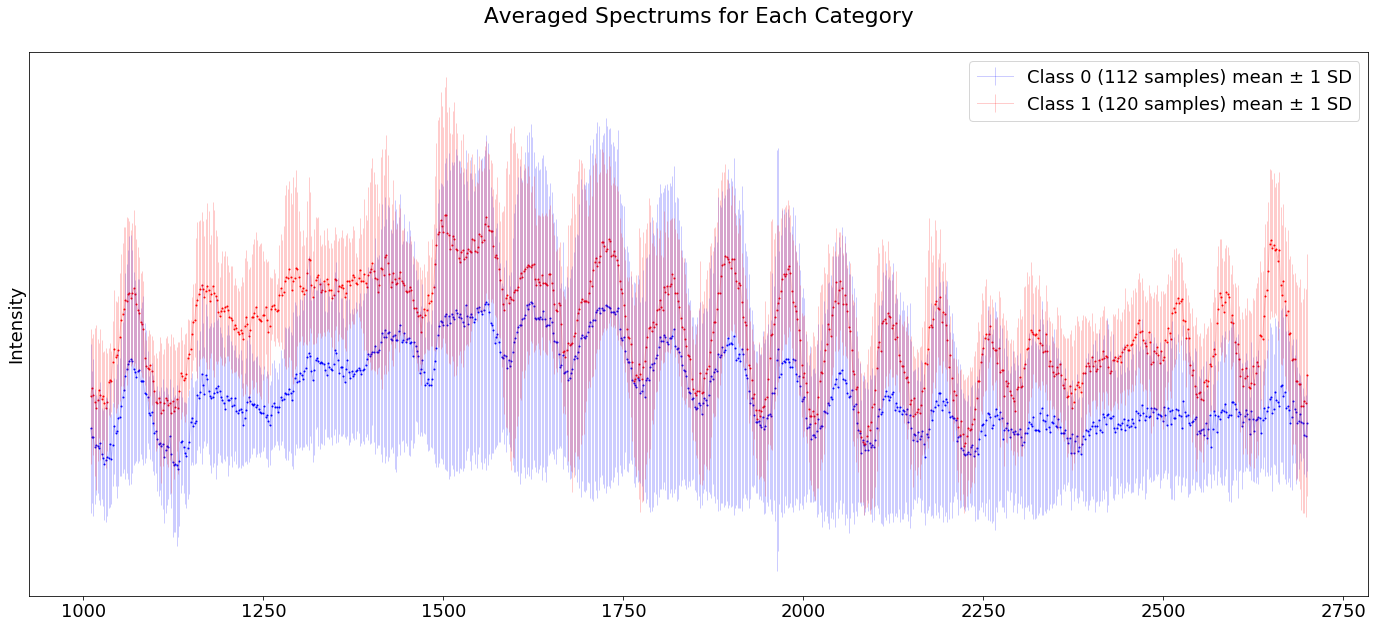

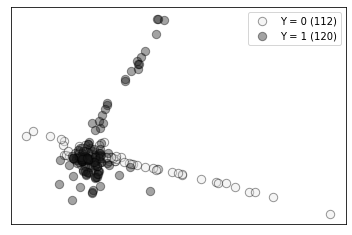

Data Set ID: 754b 铁皮石斛拉曼光谱

[云南，浙江温州]

C1 - Yunan Province (112 samples)
C2 - Zhejiang Province (120 samples)


In [1]:
from qsi.io import *
X, y, X_names, desc = LoadDataSet('shihu')

# Preprocessing


## Feature Scaling

As the kernels are actually pair-wise distances, we highly recommend do feature scaling.  Otherwise, the high-value features will have dominating effect.

In [2]:
# normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# scaling to [0,1]
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_mm_scaled = mm_scaler.fit_transform(X)

# Parameter tuning for each kernel

The Raman data is very high-dimensional. We first check individual kernels to get an optimal param on the domain data.

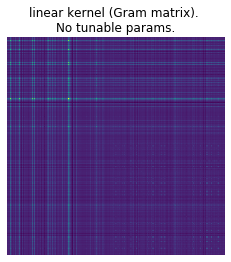

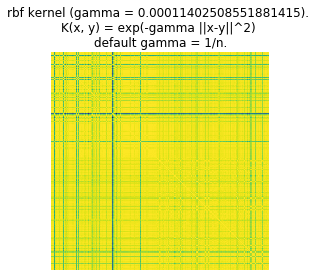

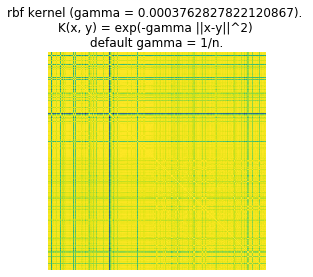

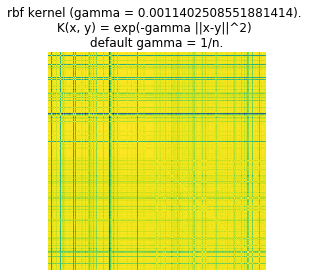

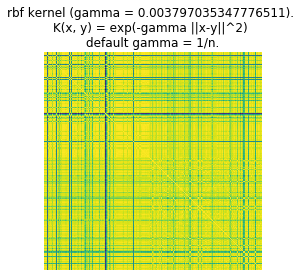

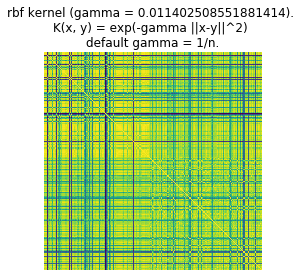

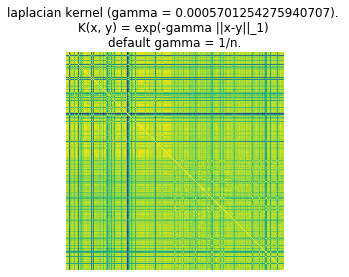

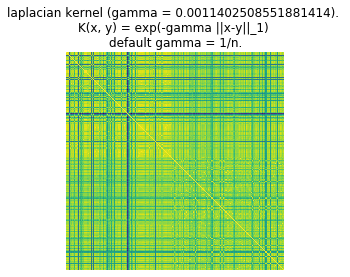

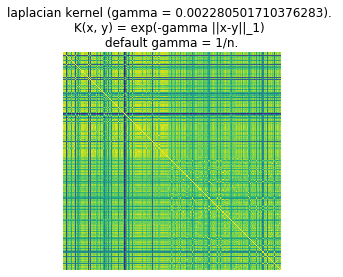

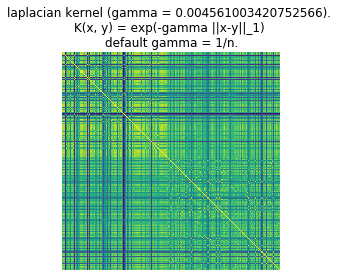

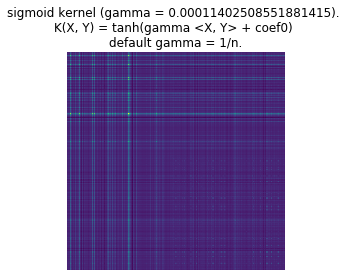

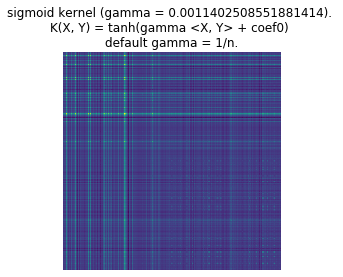

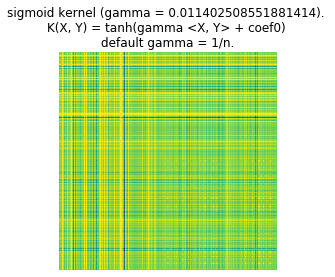

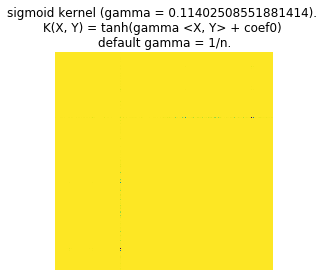

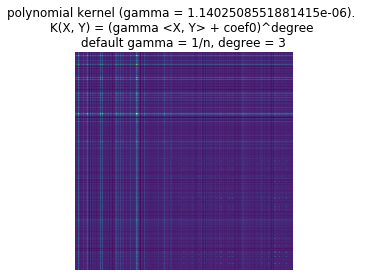

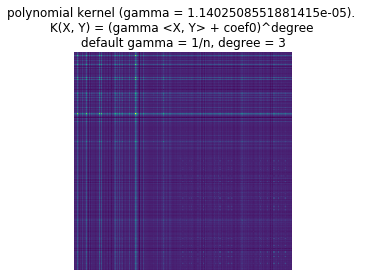

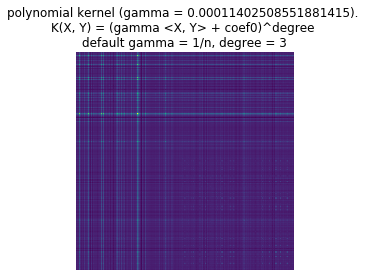

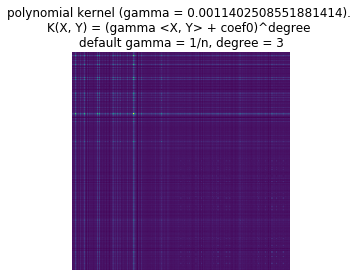

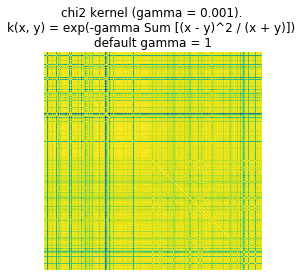

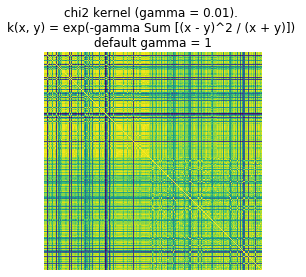

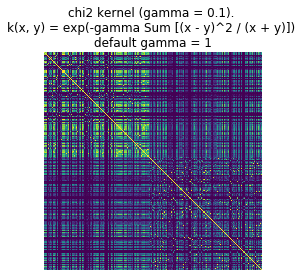

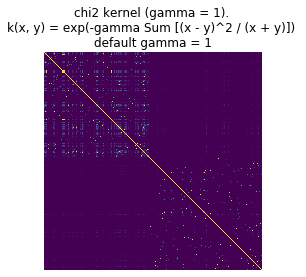

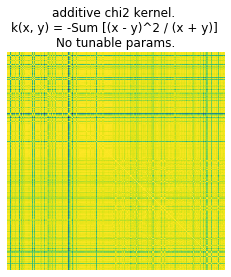

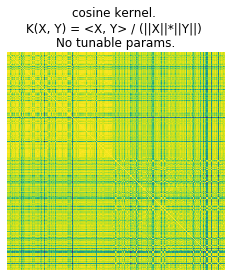

In [3]:
from qsi.cla.kernel import *
KernelTuning(X_mm_scaled)

Because the first and last half samples belong to two classes respectively. We want to get a contrasive pattern, i.e., (左上、右下) 与 （左下、右上）差别大。

linear kernel所生产的Gram Matrix 和 poly kernel 不能很好区分高维拉曼的样本距离. additive chi2 pattern较弱，其余kernel在特定param取值下pattern明显

# Grid Search for the best kernel combination

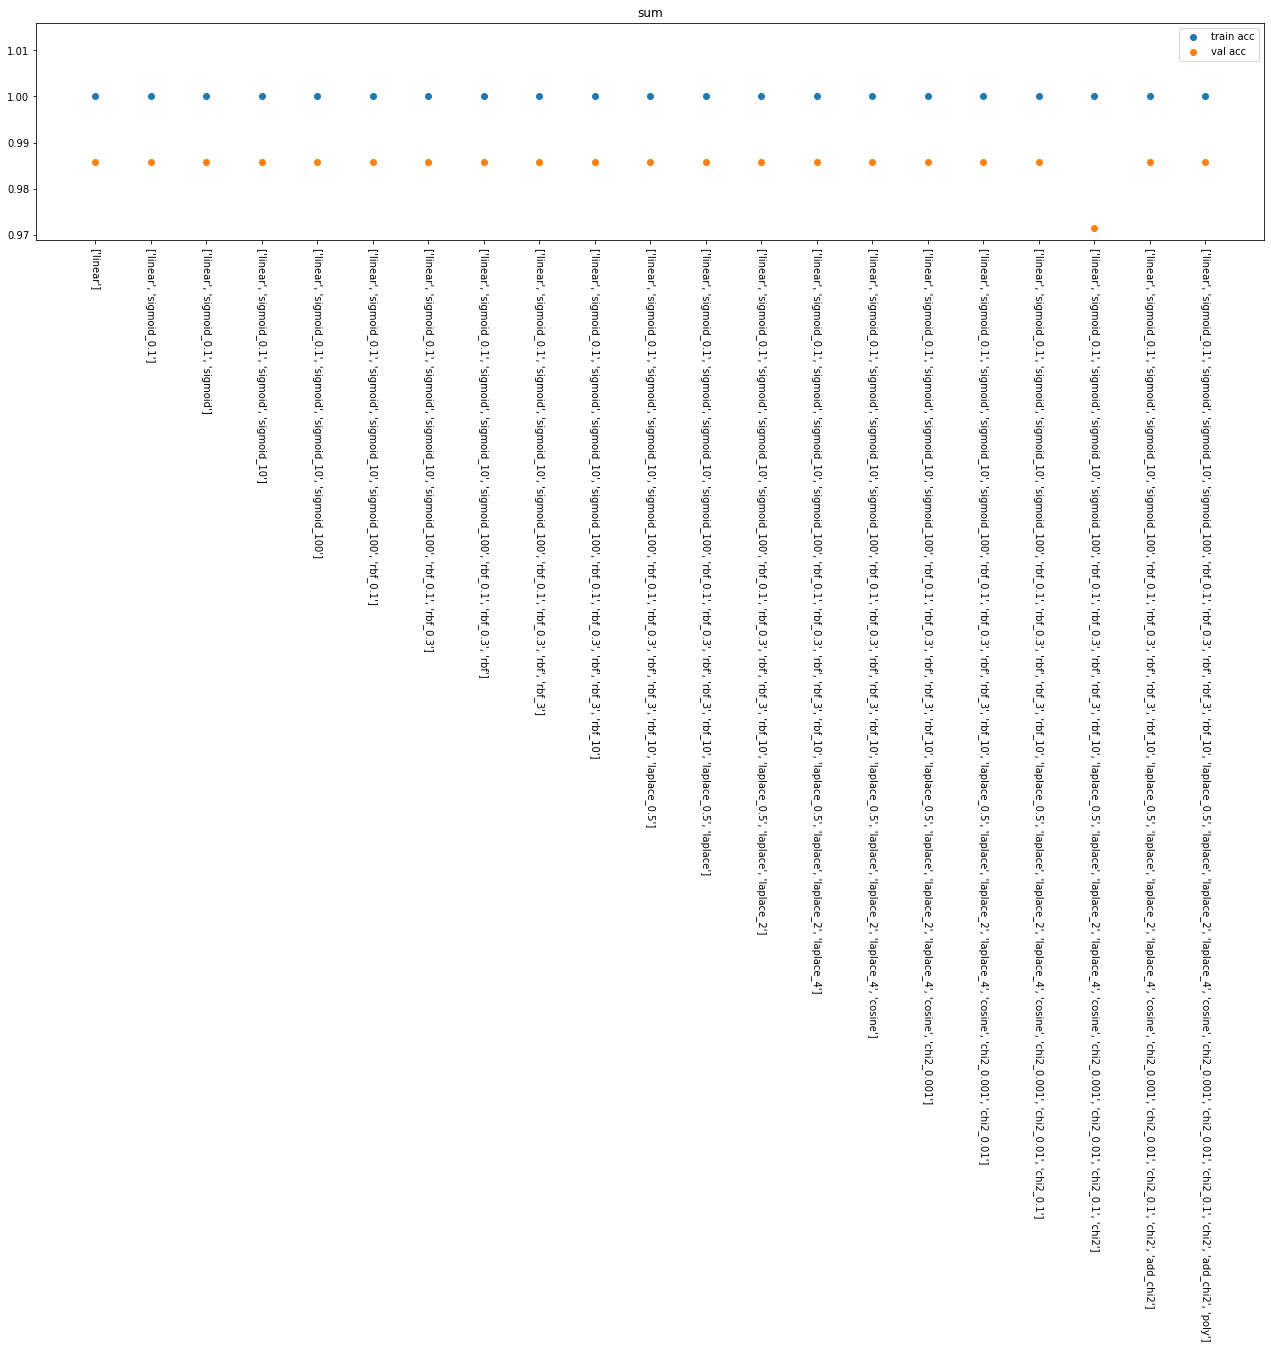

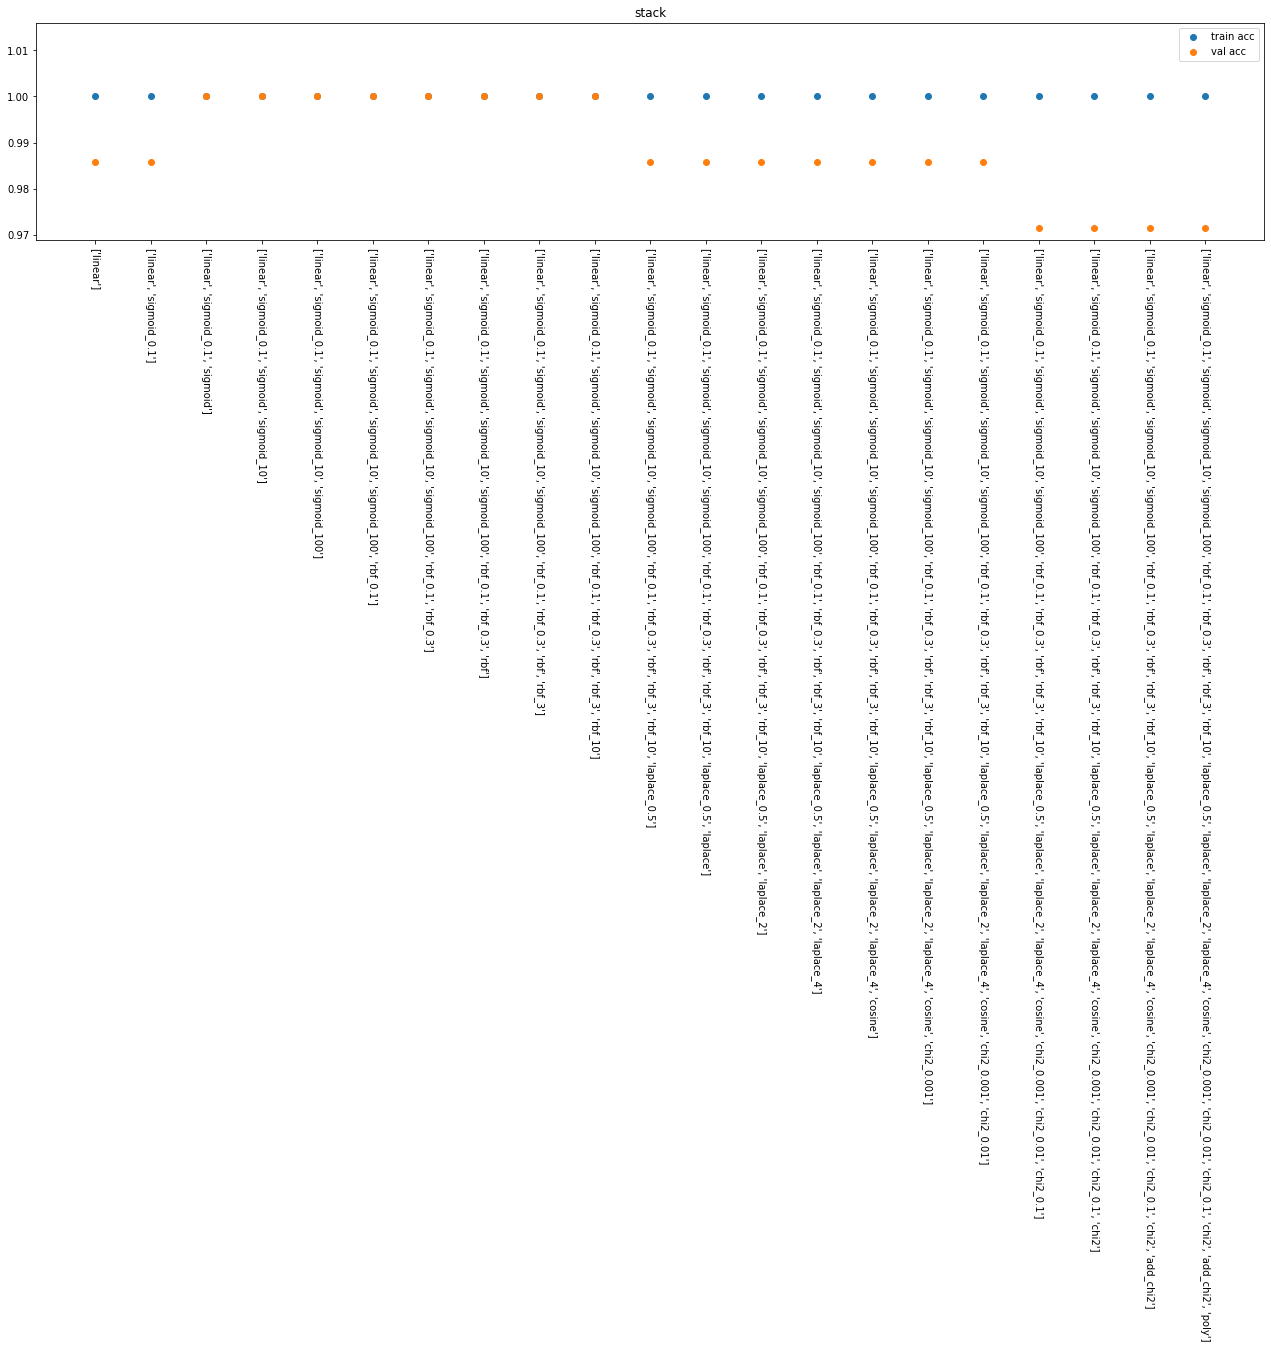

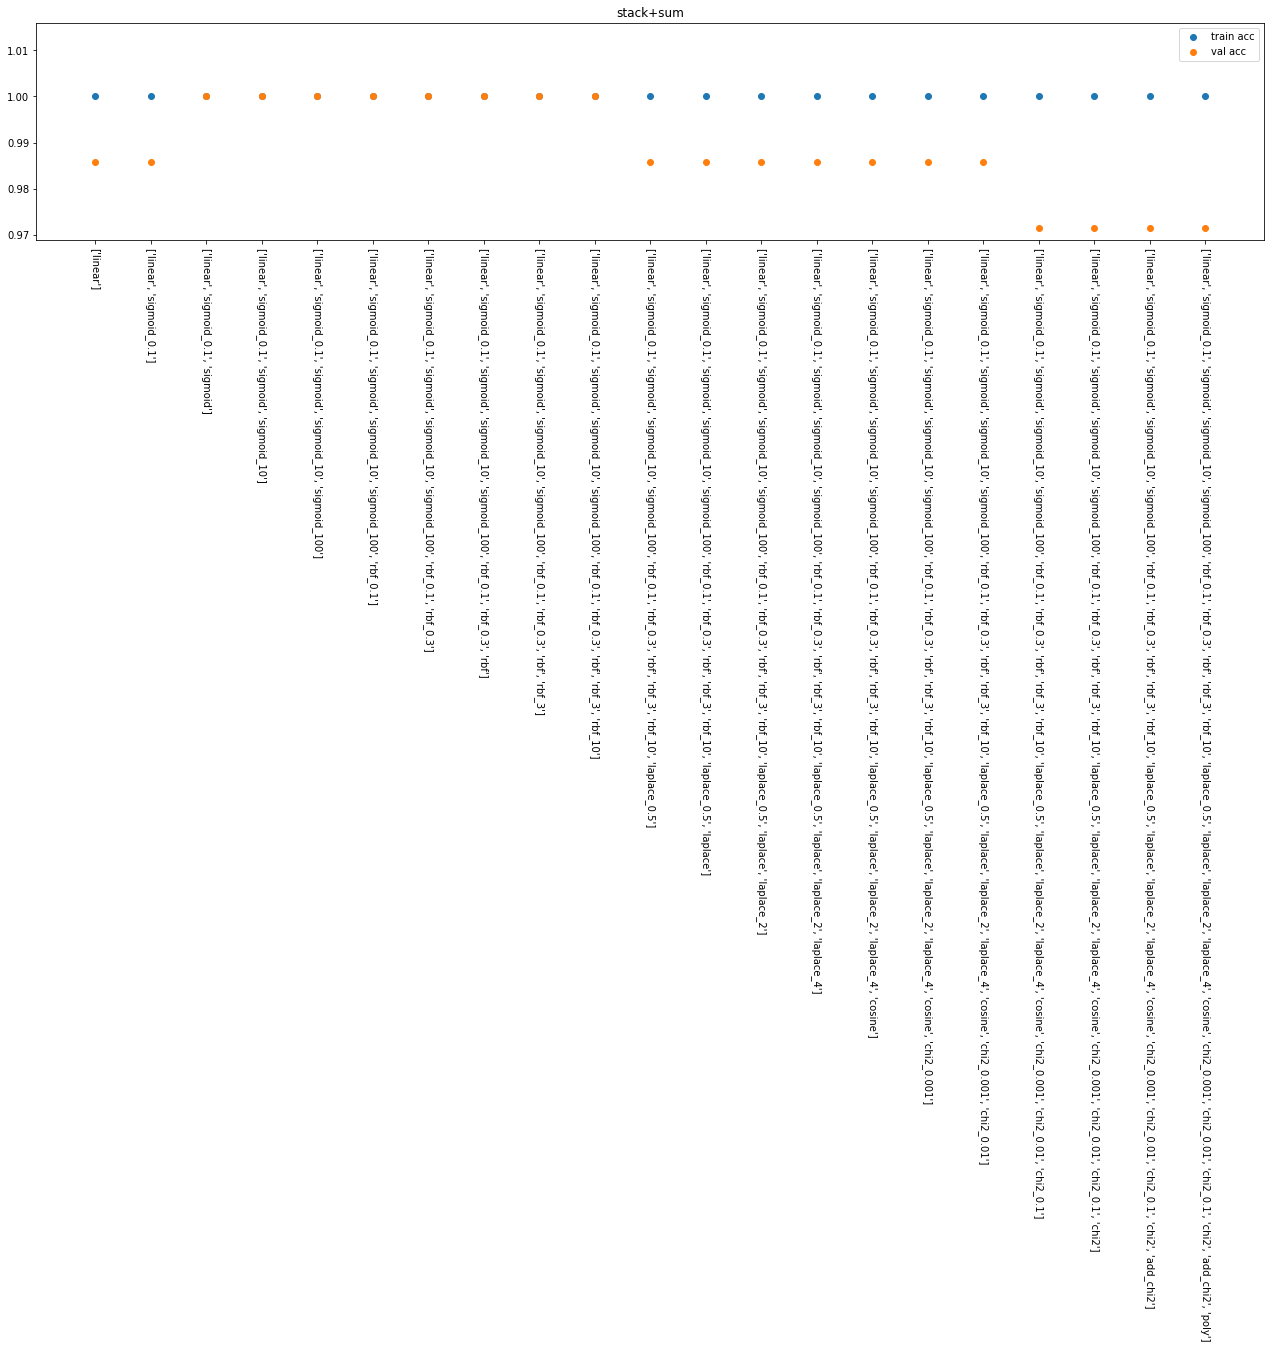

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(X_mm_scaled, y, test_size=0.3)
_ = KNNRWGridSearch(x_train, x_test, t_train, t_test, verbose = False)

# Performance comparison. Define a wrapper (use callback function parameter), which calls each specific classifier

Due to inherent randomness (e.g., random initialization), some algorithms (e.g., NNRW, MLP) have slightly different results for each run. 

# A. NNRW - ELM

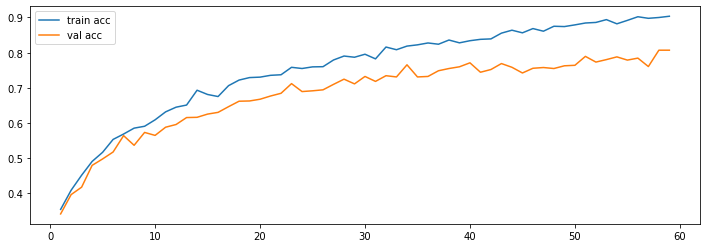

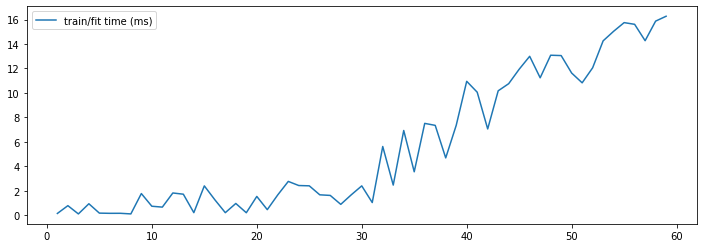

In [20]:
MTacc, MVacc, MT = nnrw.PerformenceTests(nnrw.ELMClf, X, y, Ls = list(range(1, 60)))

In [21]:
IDX = 30
print('Mean Train Acc = ', MTacc[IDX], ' Mean Test Acc = ', MVacc[IDX], ' Mean Consumed Time = ', MT[IDX])

Mean Train Acc =  0.7823843416370105  Mean Test Acc =  0.7183098591549296  Mean Consumed Time =  1.02942


# B. MLP

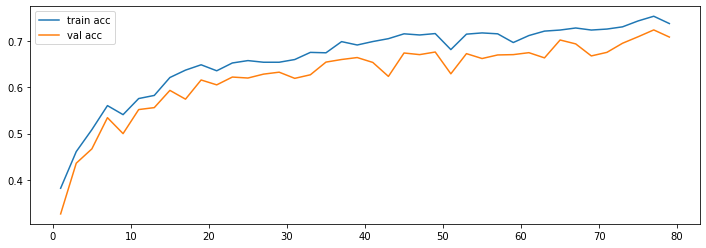

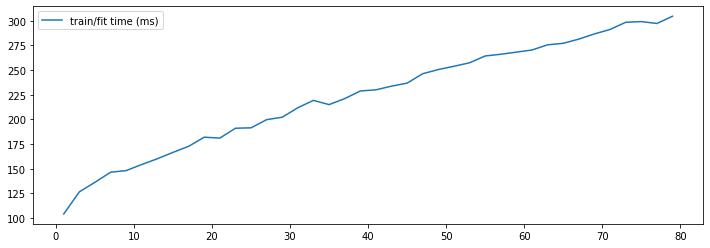

In [23]:
MTacc, MVacc, MT = nnrw.PerformenceTests(nnrw.MLPClf, X, y, Ls = list(range(1, 80, 2)))

In [24]:
IDX = 20
print('Mean Train Acc = ', MTacc[IDX], ' Mean Test Acc = ', MVacc[IDX], ' Mean Consumed Time = ', MT[IDX])

Mean Train Acc =  0.6994661921708184  Mean Test Acc =  0.654225352112676  Mean Consumed Time =  229.95863


# C. rbf-SVM

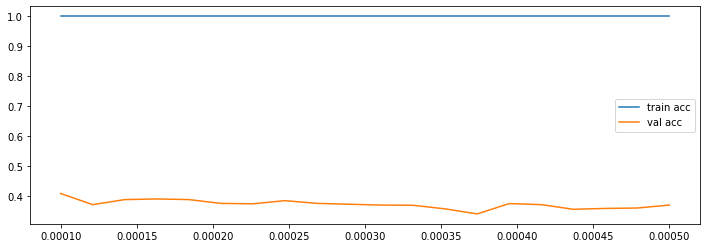

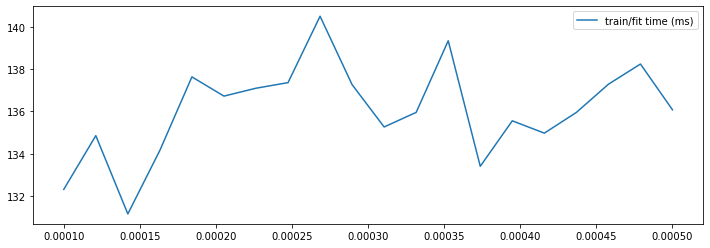

gamma = 1/(2σ^2)


In [25]:
MTacc, MVacc, MT = nnrw.PerformenceTests(nnrw.SVMClf, X, y, Ls = np.linspace(0.0001,0.0005,20).tolist())
print("gamma = 1/(2σ^2)")

In [26]:
IDX = 10 
print('Mean Train Acc = ', MTacc[IDX], ' Mean Test Acc = ', MVacc[IDX], ' Mean Consumed Time = ', MT[IDX])

Mean Train Acc =  1.0  Mean Test Acc =  0.3690140845070423  Mean Consumed Time =  135.2669


# D. Decision Tree

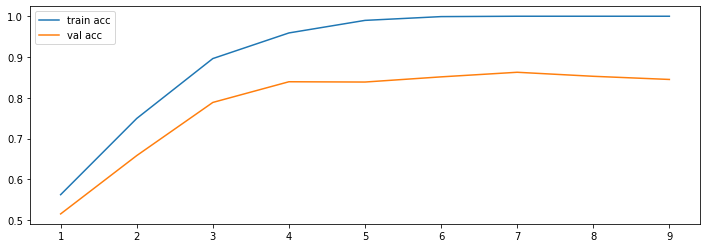

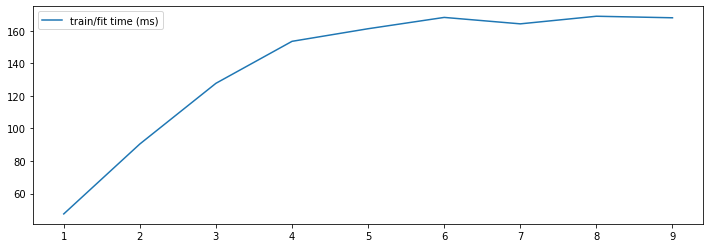

In [27]:
MTacc, MVacc, MT = nnrw.PerformenceTests(nnrw.TreeClf, X, y, Ls = list(range(1,10))) # here we use ys to gurantee it is multi-class, not regression

In [28]:
IDX = 2  # best depth 3
print('Mean Train Acc = ', MTacc[IDX], ' Mean Test Acc = ', MVacc[IDX], ' Mean Consumed Time = ', MT[IDX])

Mean Train Acc =  0.8962633451957295  Mean Test Acc =  0.7887323943661971  Mean Consumed Time =  127.73272999999999


# Appendix

### Raman Interpretation

<table>
    <thead>
        <tr class="text-center">
            <th>Wavenumber (cm-1)</th>
            <th>Raman Shift Interpretation</th>
        </tr>
    </thead>
    <tbody><tr>
                <td>1748</td>
                <td>C=O伸缩振动，主要可能源自于脂肪有关的酯基</td>
            </tr>
            <tr>
                <td>1663</td>
                <td>C=O伸缩振动和C=C伸缩振动，其中C=O伸缩振动可能主要源自于蛋白质的酰胺I键，C=C伸缩振动主要源自于不饱和脂肪酸</td>
            </tr>
            <tr>
                <td>1465</td>
                <td>CH2变形振动，可能主要源自于糖类和脂肪分子</td>
            </tr>
            <tr>
                <td>1337</td>
                <td>糖类的C-H变形振动、C-O伸缩振动或/和游离胆固醇的C-C伸缩振动</td>
            </tr>
            <tr>
                <td>1304/1260</td>
                <td>糖类以及饱和脂肪酸的CH2扭曲振动</td>
            </tr>
            <tr>
                <td>1130</td>
                <td>饱和脂肪酸的C-C伸缩振动或/和糖类的C-C伸缩振动、C-O伸缩振动以及C-O-H变形振动</td>
            </tr>
            <tr>
                <td>1080</td>
                <td>游离胆固醇的C-C伸缩振动或/和糖类的C-C伸缩振动、C-O伸缩振动以及C-O-H变形振动</td>
            </tr>
            <tr>
                <td>930</td>
                <td>胆固醇或/和糖类的C-O-C变形振动、C-O-H变形振动和C-O伸缩振动</td>
            </tr>
            <tr>
                <td>862</td>
                <td>糖类的C-C-H变形振动和C-O-C变形振动</td>
            </tr>
            <tr>
                <td>777</td>
                <td>C-C-O变形振动</td>
            </tr>
            <tr>
                <td>719</td>
                <td>C-S伸缩振动</td>
            </tr>
            <tr>
                <td>652</td>
                <td>C-C-O变形振动</td>
            </tr>
            <tr>
                <td>591/573</td>
                <td>C-C-C变形振动、C-O扭曲振动</td>
            </tr>
            <tr>
                <td>518</td>
                <td>葡萄糖</td>
            </tr>
            <tr>
                <td>484/427/363</td>
                <td>C-C-C变形振动、C-O扭曲振动</td>
            </tr>
    
</tbody></table>


<div class="alert alert-info">    
    <a class="fa fa-book" href="~/Assets/Raman bands.pdf">
        <span>Reference (Raman Bands)</span>
    </a>
</div>

### Data Science Package Version Info

In [29]:
import sklearn
import numpy
import pandas
import matplotlib
import time
import pkg_resources

print("numpy " + numpy.__version__)
print("pandas " + pandas.__version__)
print("matplotlib " + matplotlib.__version__)

print("NNRW: self-implementation " +  pkg_resources.get_distribution("pyNNRW").version)
print("MLP: sklearn " + sklearn.__version__)
print("SVM: sklearn " + sklearn.__version__)
print("DTC: sklearn " + sklearn.__version__)

numpy 1.18.1
pandas 1.0.1
matplotlib 3.1.3
NNRW: self-implementation 0.1.7
MLP: sklearn 0.22.1
SVM: sklearn 0.22.1
DTC: sklearn 0.22.1
